In [1]:
cd ..

C:\Users\Sommer Lab\Documents\Analysis Code


In [7]:
from ImageAnalysis import ImageAnalysisCode
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
import pandas as pd
import os
from scipy import constants
import pickle

In [175]:
dayfolder = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\04-2024\17 Apr 2024'

In [193]:
data_folder_ODT = [
    'Andor/ODTs',
]

data_folder_D1 = [
    'Andor/D1 bias scan Positive Polarity',
    'Andor/D1 bias scan Negative Polarity'
]

In [250]:
dataPath_ODT = [os.path.join(dayfolder, ii) for ii in data_folder_ODT]

dataPath_D1 = [os.path.join(dayfolder, jj) for jj in data_folder_D1]

In [ ]:
dayfolder = r'D:\Dropbox (Lehigh University)\Sommer Lab Shared\Data\2024\04-2024\17 Apr 2024'

In [237]:
dfs_ODT = []
dfs_D1_temp = []

for pp in dataPath_ODT:
    with open(os.path.join(pp, 'Results.pkl'), 'rb') as f:
        dfs_ODT.append( pickle.load(f) )
        
for pp in dataPath_D1:
    with open(os.path.join(pp, 'Results.pkl'), 'rb') as f:
        dfs_D1_temp.append( pickle.load(f) )
        
dfs_D1 = pd.concat(dfs_D1)

Text(0, 0.5, 'Atom Number')

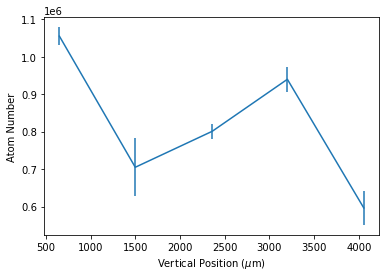

In [225]:
# ODT atom number
Atoms_ODT = dfs_ODT[0].groupby('ODT_Position').mean()
Err_ODT = dfs_ODT[0].groupby('ODT_Position').std()
plt.errorbar(Atoms_ODT['Ycenter'], Atoms_ODT['YatomNumber'], Err_ODT['YatomNumber'])
plt.xlabel('Vertical Position ($\mu$m)')
plt.ylabel('Atom Number')

Text(0, 0.5, 'Atom Number')

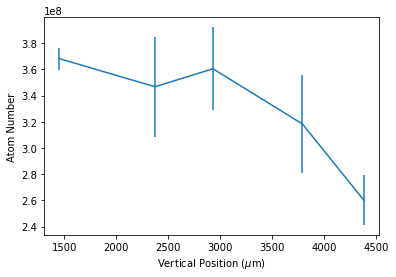

In [240]:
# D1 atom number
Atoms_D1 = dfs_D1.groupby('ODT_Position').mean()
Err_D1 = dfs_D1.groupby('ODT_Position').std()
plt.errorbar(Atoms_D1['Ycenter'], Atoms_D1['YatomNumber'], Err_D1['YatomNumber'])
plt.xlabel('Vertical Position ($\mu$m)')
plt.ylabel('Atom Number')

Text(0, 0.5, 'Atom Number Ratio')

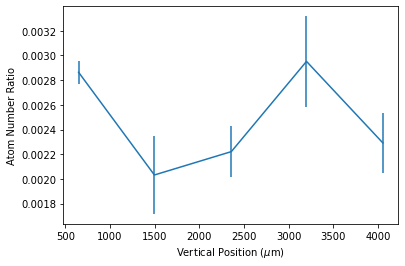

In [249]:
# ratio of atoms in ODT to atoms in D1
ratio = Atoms_ODT['YatomNumber'] / Atoms_D1['YatomNumber']

# propagation of error
ratio_std = ratio*np.sqrt( (Err_ODT['YatomNumber']/Atoms_ODT['YatomNumber'])**2 + (Err_D1['YatomNumber']/Atoms_D1['YatomNumber'])**2 )

plt.errorbar(Atoms_ODT['Ycenter'], ratio, ratio_std)
plt.xlabel('Vertical Position ($\mu$m)')
plt.ylabel('Atom Number Ratio')

In [ ]:
# Next: Include additional data from 5/16 and 5/17... ROI changed so 

TypeError: 'AxesSubplot' object is not iterable

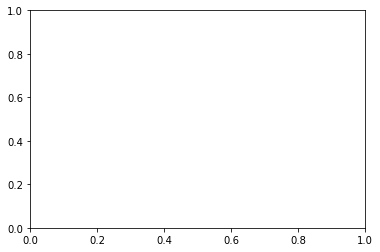

In [74]:
L = len(dfs)
y = []
err = []

fig, ax = plt.subplots(L, 1)

for dd in dfs:
    err.append( dd.groupby('Ycenter').std().Ywidth )

for ii, aa in enumerate(ax):
    y.append( dfs[ii].groupby('Ycenter').mean().YatomNumber )
    aa.plot(y[ii])
    


<ErrorbarContainer object of 3 artists>

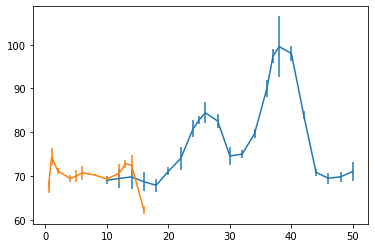

In [30]:
plt.errorbar(y[0].index, y[0], err[0])
plt.errorbar(y[1].index, y[1], err[1])

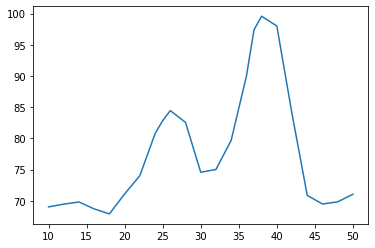

In [31]:
plt.plot(y[0])

`x0` is infeasible.


(None, None)

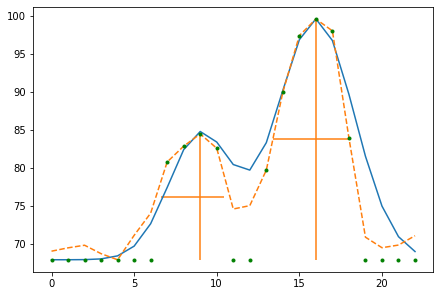

In [45]:
ImageAnalysisCode.fitMultiGaussian( y[0].values, 
                                   # xdata=dfs[0].fmod_kHz.values, 
                                   peakplot=1)

`x0` is infeasible.


(None, None)

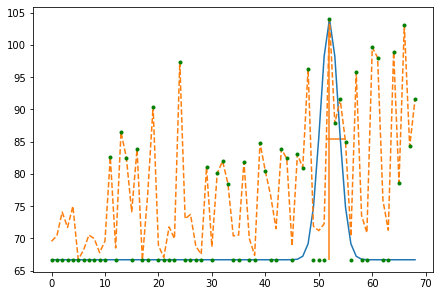

In [46]:
ImageAnalysisCode.fitMultiGaussian( dfs[0].Ywidth.values, 
                                   xdata=dfs[0].fmod_kHz.values, 
                                   peakplot=1)

In [49]:
xx = np.array([9,9,9,8,6,7,8,2,1,3,5,2,4,1,3,5,5,3,2,1])
xx

array([9, 9, 9, 8, 6, 7, 8, 2, 1, 3, 5, 2, 4, 1, 3, 5, 5, 3, 2, 1])

In [50]:
np.unique(xx)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])